<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_3_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.6_n20.csv',
 'data_add_delta_-3.6_n30.csv',
 'data_add_delta_-3.6_n60.csv',
 'data_add_delta_-3.6_n120.csv',
 'data_add_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.190456,71.740941,88.915093,-4.647845e-07,251.846489,251.846489,-2.510141e-07
1,0.0,1.0,29.765554,78.178105,27.418795,1.032812e-08,145.362454,145.362454,-3.153721e-07
2,0.0,2.0,44.276698,32.918255,35.262022,-2.610641e-06,122.456973,122.456975,-1.661640e-06
3,0.0,3.0,98.184138,92.434237,31.057048,9.486230e-08,231.675423,231.675424,-5.469525e-07
4,0.0,4.0,47.155035,60.486445,48.416084,4.469796e-07,166.057564,166.057564,7.237894e-07
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,61.241614,65.341521,50.960020,-1.660511e-07,187.543154,187.543154,-1.313393e-07
249996,999.0,246.0,33.326334,63.310570,82.973433,3.488879e-07,189.610337,189.610336,3.233858e-07
249997,999.0,247.0,59.710309,77.132214,93.230069,2.036798e-07,240.072592,240.072592,-1.217936e-07
249998,999.0,248.0,79.595095,43.952074,92.517140,8.851010e-07,226.064310,226.064310,4.413888e-07


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.190456,71.740941,88.915093,-4.647845e-07,251.846489,251.846489,-2.510141e-07
1,0.0,1.0,29.765554,78.178105,27.418795,1.032812e-08,145.362454,145.362454,-3.153721e-07
2,0.0,2.0,44.276698,32.918255,35.262022,-2.610641e-06,122.456973,122.456975,-1.661640e-06
3,0.0,3.0,98.184138,92.434237,31.057048,9.486230e-08,231.675423,231.675424,-5.469525e-07
4,0.0,4.0,47.155035,60.486445,48.416084,4.469796e-07,166.057564,166.057564,7.237894e-07
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,61.241614,65.341521,50.960020,-1.660511e-07,187.543154,187.543154,-1.313393e-07
249996,999.0,246.0,33.326334,63.310570,82.973433,3.488879e-07,189.610337,189.610336,3.233858e-07
249997,999.0,247.0,59.710309,77.132214,93.230069,2.036798e-07,240.072592,240.072592,-1.217936e-07
249998,999.0,248.0,79.595095,43.952074,92.517140,8.851010e-07,226.064310,226.064310,4.413888e-07


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    81.190456  71.740941  ...  251.846489 -2.510141e-07
      1.0    29.765554  78.178105  ...  145.362454 -3.153721e-07
      2.0    44.276698  32.918255  ...  122.456975 -1.661640e-06
      3.0    98.184138  92.434237  ...  231.675424 -5.469525e-07
      4.0    47.155035  60.486445  ...  166.057564  7.237894e-07
...                ...        ...  ...         ...           ...
999.0 245.0  61.241614  65.341521  ...  187.543154 -1.313393e-07
      246.0  33.326334  63.310570  ...  189.610336  3.233858e-07
      247.0  59.710309  77.132214  ...  240.072592 -1.217936e-07
      248.0  79.595095  43.952074  ...  226.064310  4.413888e-07
      249.0  40.171207  88.057897  ...  170.624335  3.931136e-07

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    81.190456  71.740941  ...  251.846489 -2.510141e-07
      1.0    29.765554  78.178105  ...  145.362454 -3.153721e-07
      2.0    44.276698  32.918255  ...  122.456975 -1.661640e-06
      3.0    98.184138  92.434237  ...  231.675424 -5.469525e-07
      4.0    47.155035  60.486445  ...  166.057564  7.237894e-07
...                ...        ...  ...         ...           ...
999.0 245.0  61.241614  65.341521  ...  187.543154 -1.313393e-07
      246.0  33.326334  63.310570  ...  189.610336  3.233858e-07
      247.0  59.710309  77.132214  ...  240.072592 -1.217936e-07
      248.0  79.595095  43.952074  ...  226.064310  4.413888e-07
      249.0  40.171207  88.057897  ...  170.624335  3.931136e-07

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.190456,71.740941,88.915093,-4.647845e-07,251.846489,251.846489,-2.510141e-07
1,0.0,1.0,29.765554,78.178105,27.418795,1.032812e-08,145.362454,145.362454,-3.153721e-07
2,0.0,2.0,44.276698,32.918255,35.262022,-2.610641e-06,122.456973,122.456975,-1.661640e-06
3,0.0,3.0,98.184138,92.434237,31.057048,9.486230e-08,231.675423,231.675424,-5.469525e-07
4,0.0,4.0,47.155035,60.486445,48.416084,4.469796e-07,166.057564,166.057564,7.237894e-07
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,61.241614,65.341521,50.960020,-1.660511e-07,187.543154,187.543154,-1.313393e-07
249996,999.0,246.0,33.326334,63.310570,82.973433,3.488879e-07,189.610337,189.610336,3.233858e-07
249997,999.0,247.0,59.710309,77.132214,93.230069,2.036798e-07,240.072592,240.072592,-1.217936e-07
249998,999.0,248.0,79.595095,43.952074,92.517140,8.851010e-07,226.064310,226.064310,4.413888e-07


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    81.190456  71.740941  ...  251.846489 -2.510141e-07
      1.0    29.765554  78.178105  ...  145.362454 -3.153721e-07
      2.0    44.276698  32.918255  ...  122.456975 -1.661640e-06
      3.0    98.184138  92.434237  ...  231.675424 -5.469525e-07
      4.0    47.155035  60.486445  ...  166.057564  7.237894e-07
...                ...        ...  ...         ...           ...
999.0 245.0  61.241614  65.341521  ...  187.543154 -1.313393e-07
      246.0  33.326334  63.310570  ...  189.610336  3.233858e-07
      247.0  59.710309  77.132214  ...  240.072592 -1.217936e-07
      248.0  79.595095  43.952074  ...  226.064310  4.413888e-07
      249.0  40.171207  88.057897  ...  170.624335  3.931136e-07

[250000 rows x 7 columns]

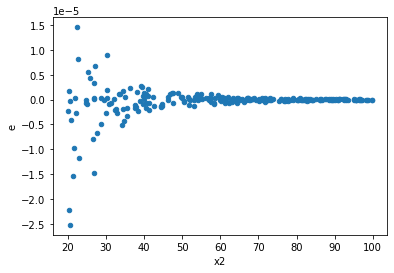

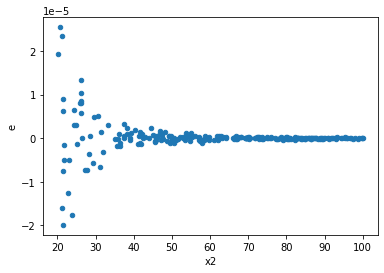

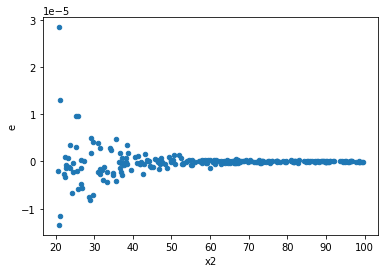

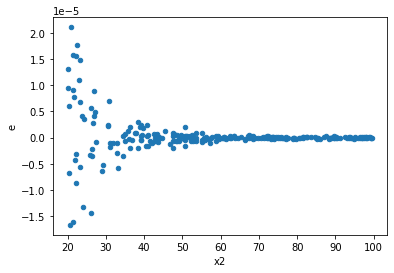

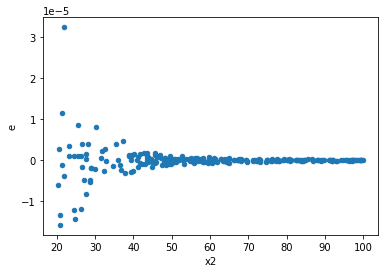

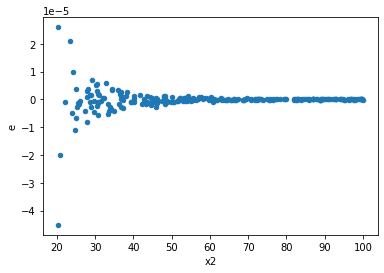

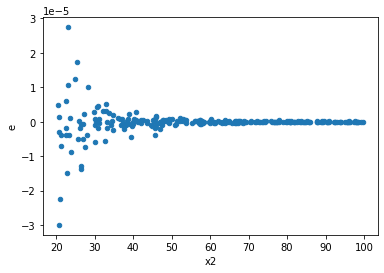

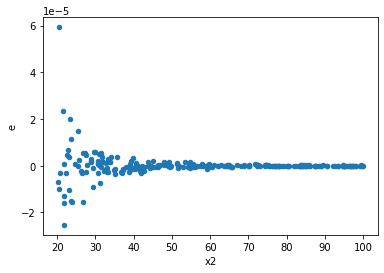

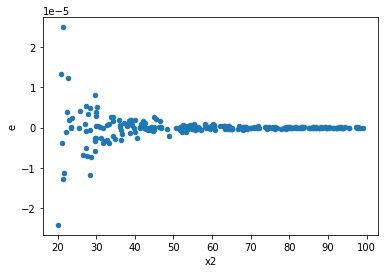

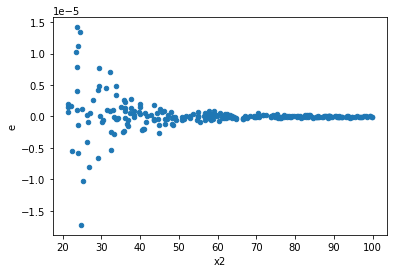

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,1.6618778741974762e-12,2.352129542487733e-09,1.731122785622371e-14,2.4501349400913886e-11,0.0007065418142062826,1.8254869886747594e-125,Reject001=0 : Heteroscedasticity
1.0,97.0,97.0,1.5054919497749085e-12,3.729885611820197e-09,1.5682207810155296e-14,3.885297512312705e-11,0.0004036295228475448,3.0259358896691027e-137,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,1.4923888520300624e-12,2.067985587693584e-09,1.5545717208646482e-14,2.1541516538474833e-11,0.0007216630816535418,5.090859336821069e-125,Reject001=0 : Heteroscedasticity
3.0,97.0,97.0,1.7808503112820123e-12,3.3832421171244277e-09,1.8550524075854294e-14,3.524210538671279e-11,0.0005263738891958577,1.170575243931128e-131,Reject001=0 : Heteroscedasticity
4.0,97.0,97.0,1.7983120741165673e-12,2.618572132304907e-09,1.8732417438714242e-14,2.727679304484278e-11,0.0006867529261199559,4.611407003002485e-126,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,1.894540158970716e-12,4.262758889270229e-09,1.9734793322611628e-14,4.440373842989822e-11,0.0004444399057472977,3.220600914541719e-135,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,1.7293512465485328e-12,3.6333577861102984e-09,1.801407548488055e-14,3.784747693864894e-11,0.00047596502969224363,8.91442279993661e-134,Reject001=0 : Heteroscedasticity
7.0,97.0,97.0,3.172138921961886e-12,7.347444680585927e-09,3.304311377043631e-14,7.653588208943673e-11,0.00043173362439102045,7.897656584078149e-136,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,1.9694473864322814e-12,2.5332289815647386e-09,2.051507694200293e-14,2.6387801891299362e-11,0.0007774454661480237,1.873956787342224e-123,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64